## Import necessary packages

In [2]:
import warnings
warnings.filterwarnings("ignore")

import hdf5plugin
import numpy as np
import anndata as ad
from scipy.sparse import csr_matrix
from CellPLM.utils import set_seed
from CellPLM_repo.CellPLM.pipeline.cell_embedding import CellEmbeddingPipeline
import scanpy as sc
import matplotlib.pyplot as plt
import torch
# import rapids_singlecell as rsc  # For faster evaluation, we recommend the installation of rapids_singlecell.

%load_ext autoreload
%autoreload 2

## Specify important parameters before getting started

In [3]:
PRETRAIN_VERSION = '20230926_85M'
DEVICE = 'cpu'

## Load Downstream Dataset

The example dataset here is from [GSE155468](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE155468).


In [4]:
set_seed(42)

data = ad.read_h5ad('code/data/Toy/concatenated.h5ad')
data.obs_names_make_unique()

## Set up the pipeline

In [5]:
pipeline = CellEmbeddingPipeline(pretrain_prefix=PRETRAIN_VERSION, # Specify the pretrain checkpoint to load
                                 pretrain_directory='../../CellPLM_repo/ckpt') # pretrain directory is in the CellPLM_repo which is not pushed to GitHub

## Evaluation and Inference

Once the pipeline is initialized, performing inference (cell embedding query) or evaluation on new datasets (with clustering metrics) can be easily accomplished using the built-in `predict` and `score` functions.

In [6]:
embedding = pipeline.predict(data, # An AnnData object
                device=DEVICE) # Specify a gpu or cpu for model inference

data.obsm['emb'] = embedding.cpu().numpy()

INFO:biothings.client:querying 1-1000...


Automatically converting gene symbols to ensembl ids...


INFO:biothings.client:done.
INFO:biothings.client:querying 1001-2000...
INFO:biothings.client:done.
INFO:biothings.client:querying 2001-3000...
INFO:biothings.client:done.
INFO:biothings.client:querying 3001-4000...
INFO:biothings.client:done.
INFO:biothings.client:querying 4001-5000...
INFO:biothings.client:done.
INFO:biothings.client:querying 5001-6000...
INFO:biothings.client:done.
INFO:biothings.client:querying 6001-7000...
INFO:biothings.client:done.
INFO:biothings.client:querying 7001-8000...
INFO:biothings.client:done.
INFO:biothings.client:querying 8001-9000...
INFO:biothings.client:done.
INFO:biothings.client:querying 9001-10000...
INFO:biothings.client:done.
INFO:biothings.client:querying 10001-11000...
INFO:biothings.client:done.
INFO:biothings.client:querying 11001-12000...
INFO:biothings.client:done.
INFO:biothings.client:querying 12001-13000...
INFO:biothings.client:done.
INFO:biothings.client:querying 13001-14000...
INFO:biothings.client:done.
INFO:biothings.client:query

After filtering, 16948 genes remain.


In [7]:
data.obsm['random'] = np.random.permutation(data.obsm['emb']) # permutate the embedding to compare between random and real data (does it really cluster)

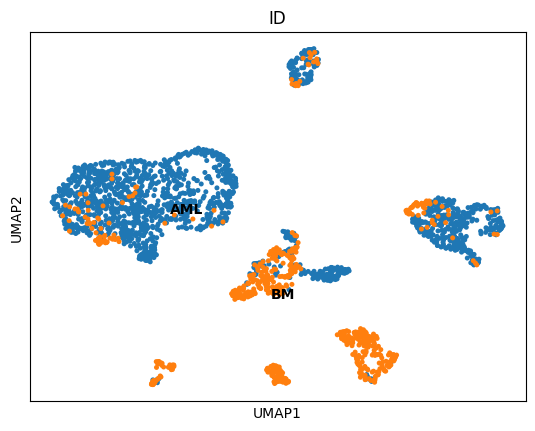

In [8]:
sc.pp.neighbors(data, use_rep='emb')
sc.tl.umap(data)
sc.pl.umap(data, color = 'ID', legend_loc = 'on data') 

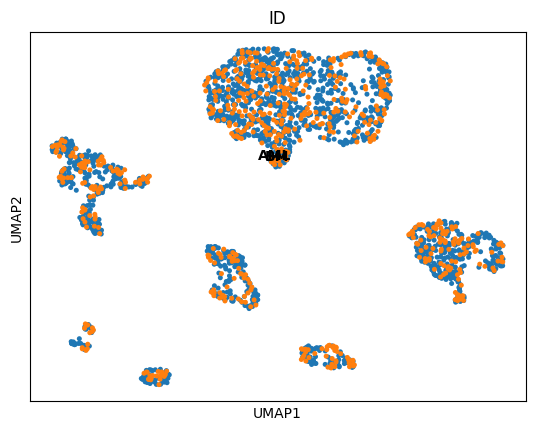

In [9]:
sc.pp.neighbors(data, use_rep='random')
sc.tl.umap(data)
sc.pl.umap(data, color = 'ID', legend_loc = 'on data') 

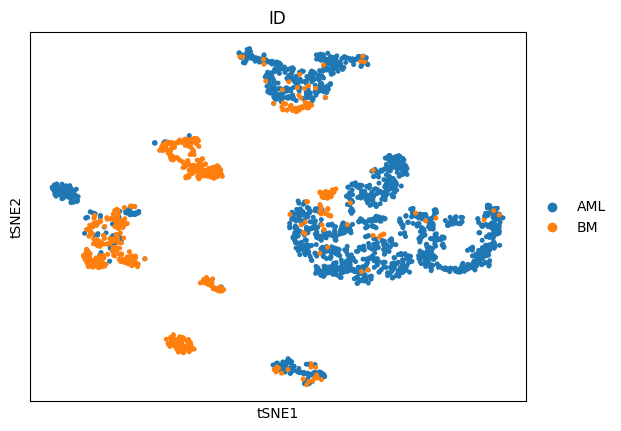

In [10]:
sc.tl.tsne(data, use_rep='emb')
sc.pl.tsne(data, color = 'ID') 

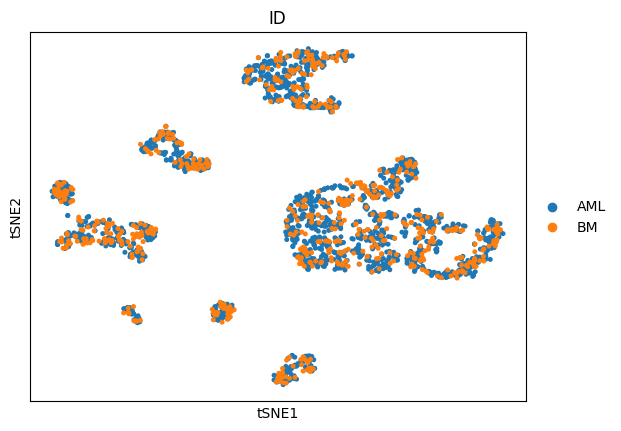

In [29]:
sc.tl.tsne(data, use_rep='random')
sc.pl.tsne(data, color = 'ID') 

In [11]:
data.obsm['emb'].shape

(2316, 512)